# Total time Function

this is the Function calculating the total time required for manufactiring and its Assembly for all model

In [170]:
def totalTime(timeMappings , order):
    timeMan =0
    timeAss =0
    idleTime =0
    timeManStart =[]
    timeAssStart =[]
    for i in order:
        timeManStart.append(timeMan)
        timeMan += int(timeMappings[i]['man'])
        if timeMan>=timeAss:
            currIdle = timeMan - timeAss
            idleTime += currIdle
            timeAssStart.append(timeAss+currIdle)
            timeAss += (currIdle+ int(timeMappings[i]['ass']))
        else:
            timeAssStart.append(timeAss)
            timeAss += timeMappings[i]['ass']
            
    totalTime = 0
    if timeMan>timeAss:
        totalTime = timeMan
    else:
        totalTime = timeAss
    return totalTime,idleTime,timeManStart,timeAssStart

# Importing files and data preprocessing

this is the section where we import data from the file and do some preprocessing stuffs

In [171]:
file = open("input.txt").read().split("\n")
data = {}
for i in file:
    record = i.split(" / ")
    data[int(record[0])]={
            'man' : int(record[1]),
            'ass': int(record[2])
        }
print(data)
keys = data.keys()
model =[]
man =[]
#ass =[]
for i in keys:
    model.append(i)
for i in range(0,len(model)):
    man.append(data[model[i]]['man'])
    #ass.append(data[model[i]]['ass'])



{1: {'man': 5, 'ass': 7}, 2: {'man': 1, 'ass': 2}, 3: {'man': 8, 'ass': 2}, 4: {'man': 5, 'ass': 4}, 5: {'man': 3, 'ass': 7}, 6: {'man': 4, 'ass': 4}}


# Finding the Order of the Manufacturing Using Greedy Programming Techneque

In [172]:
n = len(model)
for i in range(n):
    for j in range(0, n-i-1):
        if man[j] > man[j+1] :
            model[j], model[j+1] = model[j+1], model[j]
            man[j], man[j+1] = man[j+1], man[j]


import numpy as np

order = np.copy(model)
print(order)


[2 5 6 1 4 3]


In [173]:
totalTime,idleTime,manStartTimes,assStartTimes = totalTime(data,order)
with open('output.txt', 'w') as f:
    print("Order of Manufacturung:" +str(order) , file =f)
    print("Total production time for all mobiles is: "+str(totalTime) , file =f)
    print("Idle Time: "+ str(idleTime), file=f)



Order of Manufacturung:[2 5 6 1 4 3]
Total production time for all mobiles is: 28
Idle Time: 2


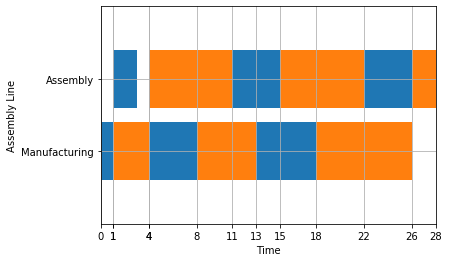

In [174]:
# Importing the matplotlb.pyplot 
def Union(lst1, lst2,list3): 
    final_list = lst1 + lst2+list3 
    return final_list 
import matplotlib.pyplot as plt 

fig, gnt = plt.subplots() 

# Setting Y-axis limits 
gnt.set_ylim(0, 15)  
gnt.set_xlim(0, totalTime) 
gnt.set_xlabel('Time') 
gnt.set_ylabel('Assembly Line')  
gnt.set_yticks([5, 10])
gnt.set_xticks(Union(manStartTimes,assStartTimes,[totalTime]))
gnt.set_yticklabels(['Manufacturing', 'Assembly']) 
gnt.grid(True)
alt = True
for i in range(0,len(order)):
    if(alt):
        alt = False
        gnt.broken_barh([(manStartTimes[i], data[order[i]]['man'])], (3, 4), facecolors =('tab:blue'))
        gnt.broken_barh([(assStartTimes[i], data[order[i]]['ass'])], (8, 4),facecolors ='tab:blue')
    else:
        alt = True
        gnt.broken_barh([(manStartTimes[i], data[order[i]]['man'])], (3, 4), facecolors =('tab:orange'))
        gnt.broken_barh([(assStartTimes[i], data[order[i]]['ass'])], (8, 4),facecolors ='tab:orange')
plt.savefig("outputImage.png")
print("\n\nOrder of Manufacturung:" +str(order))
print("Total production time for all mobiles is: "+str(totalTime))
print("Idle Time: "+ str(idleTime))


# Implementing Genetic Algorithm for Optimisation

In [175]:
"""
Importing Required Library

"""
import numpy as np
import matplotlib.pyplot as plt
import random


In [176]:
def fittnessFunction(timeMappings , order):
    timeMan =0
    timeAss =0
    idleTime =0
    for i in order:
        timeMan += int(timeMappings[i]['man'])
        if timeMan>=timeAss:
            currIdle = timeMan - timeAss
            idleTime += currIdle
            timeAss += (currIdle+ int(timeMappings[i]['ass']))
        else:
            timeAss += timeMappings[i]['ass']
            
    totalTime = 0
    if timeMan>timeAss:
        totalTime = timeMan
    else:
        totalTime = timeAss
    return totalTime,idleTime

In [177]:
"""
Population Initialization

"""
population =[]
for i in  range(10):
    order =np.random.choice(range(1,len(model)+1), len(model), replace=False)
    time,idle =fittnessFunction(data,order)
    indevidual = {'chromosomes':order,'fittness':time**2,'time':time}
    population.append(indevidual)

In [178]:
"""
Sorting the population aith fittness

"""
def sortPopulation(population):
    n = 10
    for i in range(n):
        for j in range(0, n-i-1):
            if population[j]['fittness'] > population[j+1]['fittness'] :
                population[j], population[j+1] = population[j+1], population[j]
    return population

In [179]:
population = sortPopulation(population)
for i in range(10):
    print(population[i])

{'chromosomes': array([2, 4, 5, 1, 6, 3]), 'fittness': 900, 'time': 30}
{'chromosomes': array([4, 5, 1, 2, 3, 6]), 'fittness': 961, 'time': 31}
{'chromosomes': array([1, 5, 6, 2, 3, 4]), 'fittness': 961, 'time': 31}
{'chromosomes': array([1, 2, 4, 3, 5, 6]), 'fittness': 1089, 'time': 33}
{'chromosomes': array([2, 6, 1, 4, 3, 5]), 'fittness': 1089, 'time': 33}
{'chromosomes': array([3, 5, 2, 6, 4, 1]), 'fittness': 1225, 'time': 35}
{'chromosomes': array([3, 6, 5, 2, 1, 4]), 'fittness': 1296, 'time': 36}
{'chromosomes': array([2, 3, 4, 6, 1, 5]), 'fittness': 1369, 'time': 37}
{'chromosomes': array([6, 4, 3, 1, 2, 5]), 'fittness': 1444, 'time': 38}
{'chromosomes': array([6, 3, 4, 1, 2, 5]), 'fittness': 1444, 'time': 38}


In [180]:
"""
Natural Selection
"""
def get_probability_list():
    total_fit =0
    for i in population:
        total_fit +=i['fittness']
    relative_fitness = [f['fittness']/total_fit for f in population]
    probabilities = [1-sum(relative_fitness[:i+1]) 
                     for i in range(len(relative_fitness))]
    return probabilities
def roulette_wheel_pop(population, probabilities, number):
    chosen = []
    for n in range(number):
        while True:
            r = random.random()
            index = random.randrange(10)
            if r <= probabilities[index]:
                chosen.append(population[index]['chromosomes'])
                break
    return chosen

# Modifyed Point Crossover
    It is a modifyed version of point crossover specially designed for Chromosomes containing unique elements

In [181]:
"""
Crossover

"""
def pointCrossover(selection):
    newIndevidual1 =[]
    newIndevidual2 =[]
    ind1 = np.copy(selection[0])
    ind2 = np.copy(selection[1])
    point = random.randint(2,len(model)-2)
    print(point)
    arrayAfterPoint = np.copy(ind1[point :])
    fullArray = np.copy(ind2)
    delete =[]
    for i in range(len(fullArray)):
        for j in arrayAfterPoint:
            if fullArray[i] == j:
                delete.append(i)
    resArray = np.delete(fullArray,delete ,axis =0)
    #print(arrayAfterPoint)
    #print(resArray)
    newIndevidual1 = np.hstack((np.copy(resArray),arrayAfterPoint))
    
    arrayBeforePoint = np.copy(ind2[: point])
    fullArray = np.copy(ind1)
    delete =[]
    for i in range(len(fullArray)):
        for j in arrayBeforePoint:
            if fullArray[i] == j:
                delete.append(i)
    resArray = np.delete(fullArray,delete ,axis =0)
    newIndevidual2 = np.hstack((arrayBeforePoint,np.copy(resArray)))
    return newIndevidual1,newIndevidual2

# Point mutation:
    basically Swapping any two point
            [ 2 3 4 5 6 7]  => [2 6 4 5 3 7]
                ^     ^      

In [182]:
"""
Mutation

"""

def pointMutation(indevidual,prob):
    decisonVariable =random.randrange(101)
    if decisonVariable<=prob:
        point1 =random.randint(0,len(model)-1)
        point2 = random.randint(0,len(model)-1)
        temp1 = indevidual[point1]
        temp2 = indevidual[point2]
        indevidual[point1] =temp2
        indevidual[point2] =temp1
    return indevidual

# Genetic Algorithm in Action:
        1. Natural Selection (by Roulette weel method)
        2. Modifyed Point Crossover for Chromosome with Unique Element
        3. Point mutation(Basically Swapping any two random Point in the Chromosome)

In [183]:

for i in range(0,1000):
    print("generation"+str(i))
    print(population[0])
    probablities = get_probability_list()
    selection = roulette_wheel_pop(population, probablities, 2)
    ind1,ind2 =pointCrossover(selection)
    mut1 = pointMutation(ind1,50)
    mut2 = pointMutation(ind2,50)
    time,idle =fittnessFunction(data,mut1)
    indevidual_1 = {'chromosomes':mut1,'fittness':time**2,'time':time}
    time,idle =fittnessFunction(data,mut2)
    indevidual_2 = {'chromosomes':mut2,'fittness':time**2,'time':time}
    #print(indevidual_1)
    #print(indevidual_2)
    population[8] = indevidual_1
    population[9]= indevidual_2
    population = sortPopulation(population)

generation0
{'chromosomes': array([2, 4, 5, 1, 6, 3]), 'fittness': 900, 'time': 30}
3
generation1
{'chromosomes': array([2, 4, 5, 1, 6, 3]), 'fittness': 900, 'time': 30}
3
generation2
{'chromosomes': array([2, 4, 5, 1, 6, 3]), 'fittness': 900, 'time': 30}
3
generation3
{'chromosomes': array([2, 4, 5, 1, 6, 3]), 'fittness': 900, 'time': 30}
3
generation4
{'chromosomes': array([2, 4, 5, 1, 6, 3]), 'fittness': 900, 'time': 30}
2
generation5
{'chromosomes': array([2, 6, 5, 1, 4, 3]), 'fittness': 841, 'time': 29}
3
generation6
{'chromosomes': array([2, 6, 5, 1, 4, 3]), 'fittness': 841, 'time': 29}
4
generation7
{'chromosomes': array([2, 6, 5, 1, 4, 3]), 'fittness': 841, 'time': 29}
3
generation8
{'chromosomes': array([2, 6, 5, 1, 4, 3]), 'fittness': 841, 'time': 29}
3
generation9
{'chromosomes': array([2, 6, 5, 1, 4, 3]), 'fittness': 841, 'time': 29}
2
generation10
{'chromosomes': array([2, 6, 5, 1, 4, 3]), 'fittness': 841, 'time': 29}
2
generation11
{'chromosomes': array([2, 6, 5, 1, 4, 3]

4
generation347
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
2
generation348
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
2
generation349
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
4
generation350
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
2
generation351
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation352
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
4
generation353
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
4
generation354
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation355
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation356
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
2
generation357
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation358
{'chromosomes': 

{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
4
generation704
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
2
generation705
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation706
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
2
generation707
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation708
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation709
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation710
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
2
generation711
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
4
generation712
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation713
{'chromosomes': array([2, 5, 6, 1, 4, 3]), 'fittness': 784, 'time': 28}
3
generation714
{'chromosomes': array([2, 5, 6, 

# Find all the Required Variables For ploting including the Total Time,Idle Time

In [184]:
def totalTime1(timeMappings , order):
    timeMan =0
    timeAss =0
    idleTime =0
    timeManStart =[]
    timeAssStart =[]
    for i in order:
        timeManStart.append(timeMan)
        timeMan += int(timeMappings[i]['man'])
        if timeMan>=timeAss:
            currIdle = timeMan - timeAss
            idleTime += currIdle
            timeAssStart.append(timeAss+currIdle)
            timeAss += (currIdle+ int(timeMappings[i]['ass']))
        else:
            timeAssStart.append(timeAss)
            timeAss += timeMappings[i]['ass']
            
    totalTime = 0
    if timeMan>timeAss:
        totalTime = timeMan
    else:
        totalTime = timeAss
    return totalTime,idleTime,timeManStart,timeAssStart
order1 = np.copy(population[0]['chromosomes'])
totalTime1,idleTime1,manStartTimes1,assStartTimes1 = totalTime1(data,order1)

"""
Finding all the solutions found by our algorithm

"""
minTime = population[0]['time']
sol = {}
for i in population:
    if i['time'] == minTime:
        ch =np.array2string(i['chromosomes'])
        sol[ch] = i['time']
print(sol)

{'[2 5 6 1 4 3]': 28, '[2 5 4 1 6 3]': 28, '[2 5 1 6 4 3]': 28, '[2 5 6 4 1 3]': 28}


# Plotting the Optimal Solution Found from Genetic Algorithm



Order of Manufacturung:[2 5 6 1 4 3]
Total production time for all mobiles is: 28
Idle Time: 2


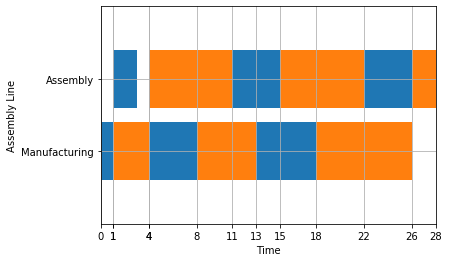

In [185]:
def Union(lst1, lst2,list3): 
    final_list = lst1 + lst2+list3 
    return final_list 
import matplotlib.pyplot as plt 

fig, gnt = plt.subplots() 

# Setting Y-axis limits 
gnt.set_ylim(0, 15)  
gnt.set_xlim(0, totalTime) 
gnt.set_xlabel('Time') 
gnt.set_ylabel('Assembly Line')  
gnt.set_yticks([5, 10])
gnt.set_xticks(Union(manStartTimes,assStartTimes,[totalTime]))
gnt.set_yticklabels(['Manufacturing', 'Assembly']) 
gnt.grid(True)
alt = True
for i in range(0,len(order1)):
    if(alt):
        alt = False
        gnt.broken_barh([(manStartTimes1[i], data[order1[i]]['man'])], (3, 4), facecolors =('tab:blue'))
        gnt.broken_barh([(assStartTimes1[i], data[order1[i]]['ass'])], (8, 4),facecolors ='tab:blue')
    else:
        alt = True
        gnt.broken_barh([(manStartTimes1[i], data[order1[i]]['man'])], (3, 4), facecolors =('tab:orange'))
        gnt.broken_barh([(assStartTimes1[i], data[order1[i]]['ass'])], (8, 4),facecolors ='tab:orange')
plt.savefig("outputImageGA.png")
print("\n\nOrder of Manufacturung:" +str(order1))
print("Total production time for all mobiles is: "+str(totalTime1))
print("Idle Time: "+ str(idleTime1))
